<a href="https://colab.research.google.com/github/JiwonDu/DA-learning-course/blob/main/DeepLearning/2_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0%EC%9D%98_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 논리게이트의 이해

and w1*x1 + w2*x2 = y
1 1 = 1 ->  0.5\*1 + 0.5\*1 = 1 > 0.7  
0 0 = 0 -> 0.5\*0 + 0.5\*0 = 0 < 0.7  
0 1 = 0 -> 0.5\*0 + 0.5\*1 = 0.5 < 0.7  
1 0 = 0 -> 0.5\*0 + 0.5\*1 = 0.5 < 0.7  


In [1]:
def AND(x1, x2) :
  w1, w2, theta = 0.5, 0.5, 0.7 # 가중치
  tmp = x1*w1 + x2*w2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1


In [5]:
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

0 0 0 1


In [6]:
def OR(x1, x2) :
  w1, w2, theta = 0.5, 0.5, 0.2 # 가중치
  tmp = x1*w1 + x2*w2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1

In [7]:
print(OR(0,0), OR(1,0), OR(0,1), OR(1,1))

0 1 1 1


# 뉴런으로 정의한 논리 게이트

In [11]:
import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(x*w) + b
  if tmp<=0:
    return 0
  else :
    return 1

In [12]:
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

0 0 0 1


In [14]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(x*w) + b
  if tmp<=0:
    return 0
  else :
    return 1

In [15]:
print(OR(0,0), OR(1,0), OR(0,1), OR(1,1))

0 1 1 1


In [16]:
# NAND 게이트
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # 가중치
    b = 0.7  # 바이어스
    tmp = np.sum(w * x) + b
    return 1 if tmp > 0 else 0

In [17]:
print(NAND(0,0), NAND(1,0), NAND(0,1), NAND(1,1))

1 1 1 0


# 다층 퍼셉트론 Multi Layer Perceptron
```
x1 x2   nand  or  and = y
0  0      1   0      0
1  0      1   1      1
0  1      1   1      1
1  1      0   0      0
```

In [19]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [20]:
print(XOR(0,0), XOR(1,0), XOR(0,1), XOR(1,1))

0 1 1 0


> 핵심
1. 퍼셉트론은 입력과 출력이 있는 알고리즘이다. 입력을 정해진 규칙에 따라 계산해서 출력한다.
2. 퍼셉트론은 가중치와 편향(바이어스)를 이용해서 매개변수로 설정한다.
3. 퍼셉트론 하나로 AND, OR 같은 논리 게이트를 구성할 수 있다. - 선형
4. XOR 같은 복합논리는 퍼셉트론을 연결해서 처리한다. - 비선형
5. XOR는 2단 퍼셉트론으로 구성할 수 있다.

- 교재 2.4 참고

In [22]:
# 61p. 손글씨 데이터셋
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
len(train_labels)

60000

In [26]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [30]:
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255

In [32]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8742 - loss: 0.4386
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9656 - loss: 0.1196
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9774 - loss: 0.0757
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9887 - loss: 0.0401


In [33]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([1.1552741e-08, 4.9836451e-09, 4.9230056e-07, 7.0148312e-06,
       1.7391096e-10, 1.9201142e-08, 4.4149289e-12, 9.9999160e-01,
       1.4996996e-08, 8.4068182e-07], dtype=float32)

In [34]:
predictions[0].argmax()

7

In [35]:
test_labels[0]

7

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0780
test_acc: 0.9799000024795532


# 신경망을 위한 데이터 표현

## 스칼라(랭크-0 텐서)
- 스칼라(scalar) : 하나의 숫자만 담고 있는 텐서
- 스칼라 텐서, 랭크-0텐서, 0D 텐서
- 스칼라 텐서의 축의 개수(랭크) = 0

In [37]:
import numpy as np
x = np.array(12)
x

array(12)

In [38]:
x.ndim

0

## 벡터(랭크-1 텐서)

- 벡터(Vector) : 숫자의 배열
- 랭크-1 텐서, 1D 텐서
- 축의 개수 = 1

In [39]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [40]:
x.ndim

1

- 5개의 원소를 가지고 있으므로 5차원 벡터임 (벡터와 텐서 혼동하지 말것)
  - 5D 벡터 : 하나의 축을 따라 5개의 차원을 가짐
  - 5D 텐서 : 5개의 축을 가진 것

## 행렬(랭크-2 텐서)

- 행렬(matrix) : 벡터의 배열
- 랭크-2 텐서, 2D 텐서
- 축의 개수 : 2개

In [41]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

- 첫 번째 축에 놓여 있는 원소: 행, [5, 78, 2, 34, 0]
- 두 번째 축에 놓여 있는 원소: 열, [5, 6, 7]

## 랭크-3 텐서와 더 높은 랭크의 텐서

- 행렬들을 하나의 새로운 배열로 합쳐 숫자가 채워진 직육면체 형태로 해석할 수 있는 텐서
- 3D 텐서

In [42]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

- 랭크-3 텐서들을 하나의 배열로 합치면 랭크-4 텐서
- 딥러닝에서는 보통 랭크 0~4까지 다룸 (동영상 데이터는 5까지 가기도 함)

## 핵심 속성

- 랭크(축의 개수, ndim) / 크기(shape) / 데이터 타입(dtype)

In [43]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [44]:
train_images.ndim

3

In [45]:
train_images.shape

(60000, 28, 28)

In [46]:
train_images.dtype

dtype('uint8')

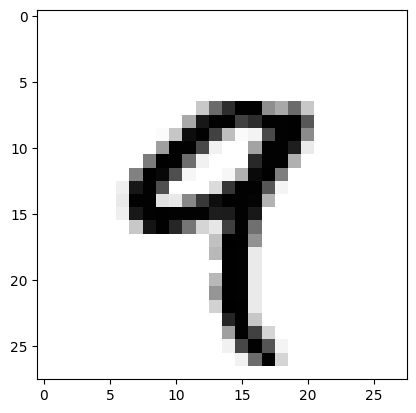

In [47]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [49]:
train_labels[4]

9

## 넘파이로 텐서 조작하기

- 슬라이싱 : 배열에 있는 특정 원소 선택

In [50]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [51]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [52]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [53]:
my_slice = train_images[:, 14:, 14:]

In [54]:
my_slice = train_images[:, 7:-7, 7:-7]

## 배치 데이터

- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis = sample dimension)
- 배치 데이터 : 데이터를 한번에 처리하는 단위

In [55]:
batch = train_images[:128]

In [56]:
batch = train_images[128:256]

In [57]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

## 텐서의 실제 사례
- 벡터 데이터 : 랭크-2 텐서(smples, features), 각 샘플은 수치 속성(특성)으로 구성된 벡터
- 시계열 데이터 또는 시퀀스 데이터 : 랭크-3 텐서(samples, timeseps, features) 각 샘플은 특성 벡터의 시퀀스
- 이미지 :랭크-4 텐서(samples, height, width, channels / samples, channels, height, width), 각 샘플은 픽셀의 2D 격자, 픽셀은 수치 값(채널)의 벡터
- 동영상 : 랭크-5 텐서(samples, frames, height, width, channels / samples, frames, channels, height, width), 각 샘플은 이미지의 시퀀스

# 신경망의 톱니바퀴: 텐서 연산

## 원소별 연산

In [58]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [59]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [60]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [61]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.98 s


## 브로드캐스팅

- 모호하지 않고 실행 가능하다면, 작은 텐서가 큰 텐서의 크기에 맞추어 broadcasting 됨.
  1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축 추가
  2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

In [62]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [63]:

y = np.expand_dims(y, axis=0)

In [64]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [65]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

## 텐서 곱셈

In [66]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [67]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [68]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [69]:

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return

In [70]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

## 텐서 크기 변환

In [71]:
train_images = train_images.reshape((60000, 28 * 28))

In [72]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [73]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [74]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [75]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

## 텐서 연산의 기하학적 해석

- 이동, 회전, 크기 변경, 선형 변환, 아핀 변환, relu 활성화 함수를 사용하는 아핀변환

## 딥러닝의 기하학적 해석

- 신경망 = 전체적으로 텐서 연산의 연결로 구성된 것
- 텐서 연산 = 입력한 데이터의 간단한 기하학적 변환
- 즉, 단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것